# Algoritmo de proyección

Se evalúa el proceso de estimación por el algoritmo de proyección en un caso muy simple, consistente en un modelo ARMA

$$ y_{k+1} = a y_k + b u_k $$

El algoritmo incluye la posibilidad de variar el factor gamma para modificar la convergencia, así como el factor de olvido.

In [1]:
import control as ctrl
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipykernel_31685/4122739510.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e[k] = y[k] - y_pred


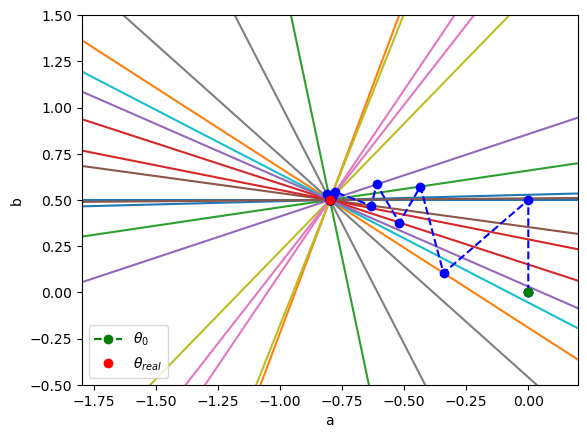

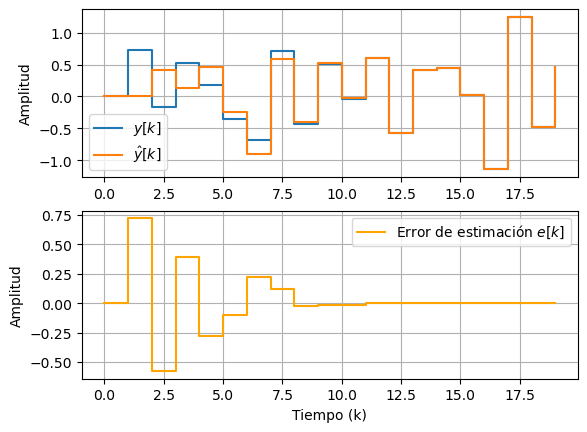

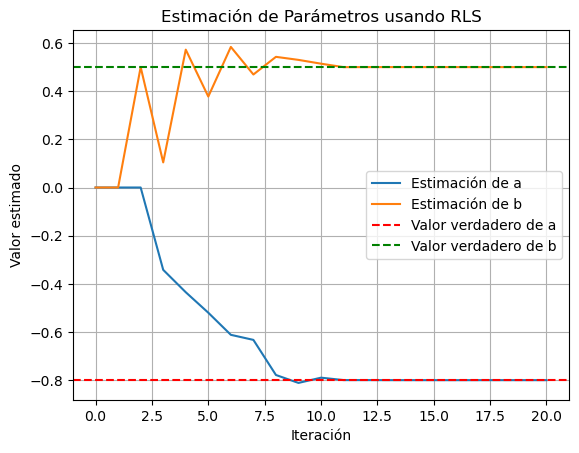

In [84]:
# Parámetros verdaderos
a, b = -0.8, 0.5
theta = np.random.randn(2, 1)

# Para el caso simple de estudio dejar alpha=0 y gamma=1
gamma = 1
alpha = 0

N = 20
#u = np.ones((N,)) 
u = np.random.randn(N)
y = np.zeros_like(u)
e = np.zeros_like(u)
theta = np.zeros((2,N+1))
for k in range(1, N):  
    y[k] = a*y[k-1] + b*u[k-1] 

plt.figure()
for k in range(1,N):
    x = np.array([[y[k-1]], [u[k-1]]])
    y_pred = theta[:,k].T @ x
    e[k] = y[k] - y_pred 
    theta[:,k+1] = theta[:,k] + ((gamma*x)/(alpha+x.T@x) * e[k]).flatten()
    
    # Construyo una recta solución del sistema
    v = np.array([-x[1], x[0]])
    t = np.linspace(-10, 10, 100)
    p = theta[:, k+1]
    recta =  p[:,None] + v * t  # 2x100

    plt.plot(recta[0, :], recta[1, :])
plt.plot(theta[0,:], theta[1,:],'bo--')
plt.plot(theta[0,0], theta[1,0],'go--',label='$\\theta_0$')
plt.plot(a, b,'ro',label='$\\theta_{{real}}$')
plt.xlim(a-1,a+1)
plt.ylim(b-1,b+1)
plt.xlabel('a')
plt.ylabel('b') 
plt.legend()

k = np.arange(N)
plt.figure()
plt.subplot(2,1,1)
plt.step(k,y,where='post', label='$y[k]$')
plt.step(k,y - e, where='post', label='$\\hat{y}[k]$')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.step(k,e, where='post', label='Error de estimación $e[k]$', color='orange')
plt.xlabel('Tiempo (k)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.figure()
plt.plot(theta[0,:], label='Estimación de a')
plt.plot(theta[1,:], label='Estimación de b')
plt.axhline(y=a, color='r', linestyle='--', label='Valor verdadero de a')
plt.axhline(y=b, color='g', linestyle='--', label='Valor verdadero de b')
plt.xlabel('Iteración')
plt.ylabel('Valor estimado')
plt.title('Estimación de Parámetros usando RLS')
plt.legend()
plt.grid()
plt.show()



